In [6]:
%load_ext autoreload
%autoreload 2

# IMPORT LIBRARIES
from Dataset import *
import cupy as cp
from bpnn_cuda import BPNN
from tqdm.notebook import tqdm

def convert_categories(y_cat):
    desired = cp.array([0 if y[0] == 1 else 1 for y in y_cat])
    return desired

def get_data():
    d = Dataset.load_gzip(os.path.join("datasets", "face_mask_pickled"), "dataset_gray_conv.pkl.gzip")

    ndimen = d.train.X.shape[1]

    # Structure Training Data for BPNN
    training_inputs = [cp.reshape(cp.asarray(x), (ndimen, 1)) for x in d.train.X]
    training_results = [cp.asarray(y.reshape(-1, 1)) for y in d.train.y]

    training_data = zip(training_inputs, training_results)
    # Structure Validation Data for BPNN
    validation_inputs = [cp.reshape(cp.asarray(x), (ndimen, 1)) for x in d.validation.X]
    validation_data = zip(validation_inputs, convert_categories(d.validation.y))
    # Structure Testing Data for BPNN
    testing_inputs = [cp.reshape(cp.asarray(x), (ndimen, 1)) for x in d.test.X]
    testing_data = zip(testing_inputs, convert_categories(d.test.y))

    return training_data, validation_data, testing_data, ndimen


training_data, validation_data, testing_data, ndimen = get_data()
print(f"Input Dimension: {ndimen}")

ntrials = 1
max_epochs = 30
init_nc = [ndimen, 6000, 3500, 2500, 1500, 1000, 2]
init_b = 50
init_lr = 0.55

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Input Dimension: 900


In [ ]:
model_BPNN = BPNN(init_nc, verbose=True, random_init=True)
final_score, eval_scores, eval_scores_deltas, conv_time = model_BPNN.train(training_data,
                                                                           max_epochs=max_epochs,
                                                                           batch_size=init_b,
                                                                           learning_rate=init_lr,
                                                                           evaluation_data=validation_data)


Training Epoch vs. Accuracy (Effect of Network Configuration)


  0%|          | 0/35 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

[900, 200, 50, 2] => 0.89875


  0%|          | 0/30 [00:00<?, ?it/s]

[900, 200, 100, 2] => 0.895


  0%|          | 0/30 [00:00<?, ?it/s]

[900, 200, 200, 2] => 0.87875


  0%|          | 0/30 [00:00<?, ?it/s]

[900, 200, 300, 50, 2] => 0.88625


  0%|          | 0/30 [00:00<?, ?it/s]

[900, 200, 350, 100, 2] => 0.875


  0%|          | 0/30 [00:00<?, ?it/s]

[900, 200, 400, 150, 2] => 0.88125


  0%|          | 0/30 [00:00<?, ?it/s]

[900, 200, 450, 200, 2] => 0.87625


  0%|          | 0/30 [00:00<?, ?it/s]

[900, 300, 50, 2] => 0.89625


  0%|          | 0/30 [00:00<?, ?it/s]

[900, 300, 100, 2] => 0.90875


  0%|          | 0/30 [00:00<?, ?it/s]

[900, 300, 200, 2] => 0.89


  0%|          | 0/30 [00:00<?, ?it/s]

[900, 300, 300, 2] => 0.90625


  0%|          | 0/30 [00:00<?, ?it/s]

[900, 300, 300, 50, 2] => 0.875


  0%|          | 0/30 [00:00<?, ?it/s]

[900, 300, 350, 100, 2] => 0.9


  0%|          | 0/30 [00:00<?, ?it/s]

[900, 300, 400, 150, 2] => 0.89375


  0%|          | 0/30 [00:00<?, ?it/s]

[900, 300, 450, 150, 2] => 0.88125


  0%|          | 0/30 [00:00<?, ?it/s]

[900, 400, 50, 2] => 0.88875


  0%|          | 0/30 [00:00<?, ?it/s]

[900, 400, 100, 2] => 0.89


  0%|          | 0/30 [00:00<?, ?it/s]

[900, 400, 200, 2] => 0.88125


  0%|          | 0/30 [00:00<?, ?it/s]

[900, 400, 300, 2] => 0.8875


  0%|          | 0/30 [00:00<?, ?it/s]

[900, 400, 400, 2] => 0.895


  0%|          | 0/30 [00:00<?, ?it/s]

[900, 400, 300, 50, 2] => 0.88375


  0%|          | 0/30 [00:00<?, ?it/s]

[900, 400, 350, 100, 2] => 0.8725


  0%|          | 0/30 [00:00<?, ?it/s]

[900, 400, 400, 150, 2] => 0.86625


  0%|          | 0/30 [00:00<?, ?it/s]

[900, 400, 450, 150, 2] => 0.88875


  0%|          | 0/30 [00:00<?, ?it/s]

[900, 500, 50, 2] => 0.88125


  0%|          | 0/30 [00:00<?, ?it/s]

[900, 500, 100, 2] => 0.9125


  0%|          | 0/30 [00:00<?, ?it/s]

[900, 500, 200, 2] => 0.875


  0%|          | 0/30 [00:00<?, ?it/s]

[900, 500, 300, 2] => 0.905


  0%|          | 0/30 [00:00<?, ?it/s]

[900, 500, 400, 2] => 0.885


  0%|          | 0/30 [00:00<?, ?it/s]

[900, 500, 400, 2] => 0.885


  0%|          | 0/30 [00:00<?, ?it/s]

[900, 500, 500, 2] => 0.90125


  0%|          | 0/30 [00:00<?, ?it/s]

[900, 500, 300, 50, 2] => 0.88875


  0%|          | 0/30 [00:00<?, ?it/s]

[900, 500, 350, 100, 2] => 0.8675


  0%|          | 0/30 [00:00<?, ?it/s]

[900, 500, 400, 150, 2] => 0.86


  0%|          | 0/30 [00:00<?, ?it/s]

[900, 500, 450, 150, 2] => 0.50375


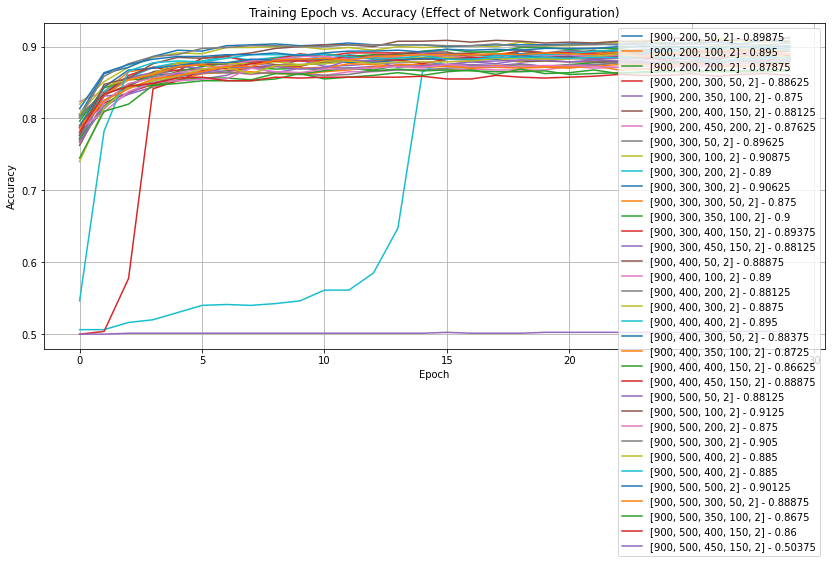

Best network configuration: [900, 500, 100, 2]


In [9]:
def plot_accuracies_hidden_layers_and_nodes(save_dir, layers_arr):
    os.makedirs(save_dir, exist_ok=True)
    print(f"Training Epoch vs. Accuracy (Effect of Network Configuration)")

    fig = plt.figure(figsize=(14, 6))
    plt.title(
        f"Training Epoch vs. Accuracy (Effect of Network Configuration)")
    plt.xlabel("Epoch")
    plt.ylabel('Accuracy')

    best_score = 0
    best_config = None

    for layers in tqdm(layers_arr):
        final_scores = []
        epoch_scores = []
        # Run an average over multiple trials
        for i in range(ntrials):
            # Get data and train the network
            training_data, validation_data, testing_data, ndimen = get_data()
            nn = BPNN(layers, verbose=False, random_init=True)
            final_score, eval_scores, eval_scores_deltas, conv_time = nn.train(training_data,
                                                                               max_epochs=max_epochs,
                                                                               batch_size=init_b,
                                                                               learning_rate=init_lr,
                                                                               evaluation_data=validation_data,
                                                                               evaluation_treshold=None)
            final_scores.append(final_score)
            epoch_scores.append(eval_scores)

        # Compute the averages over the specified number of trials
        final_score_avg = np.average(final_scores)
        epoch_scores = np.mean(epoch_scores, axis=0)

        print(f'{layers} => {final_score_avg}')
        if final_score_avg > best_score:
            best_score = final_score_avg
            best_config = layers
        plt.plot(epoch_scores, label=f'{layers} - {final_score_avg}')

    plt.grid()
    plt.legend()
    plt.show()
    fig.savefig(f'{save_dir}/bpnn_layers_vs_acc', dpi=100)

    return best_config


layers_arr = [[ndimen, 200, 50, 2],
              [ndimen, 200, 100, 2],
              [ndimen, 200, 200, 2],
              [ndimen, 200, 300, 50, 2],
              [ndimen, 200, 350, 100, 2],
              [ndimen, 200, 400, 150, 2],
              [ndimen, 200, 450, 200, 2],

              [ndimen, 300, 50, 2],
              [ndimen, 300, 100, 2],
              [ndimen, 300, 200, 2],
              [ndimen, 300, 300, 2],
              [ndimen, 300, 300, 50, 2],
              [ndimen, 300, 350, 100, 2],
              [ndimen, 300, 400, 150, 2],
              [ndimen, 300, 450, 150, 2],

              [ndimen, 400, 50, 2],
              [ndimen, 400, 100, 2],
              [ndimen, 400, 200, 2],
              [ndimen, 400, 300, 2],
              [ndimen, 400, 400, 2],
              [ndimen, 400, 300, 50, 2],
              [ndimen, 400, 350, 100, 2],
              [ndimen, 400, 400, 150, 2],
              [ndimen, 400, 450, 150, 2],

              [ndimen, 500, 50, 2],
              [ndimen, 500, 100, 2],
              [ndimen, 500, 200, 2],
              [ndimen, 500, 300, 2],
              [ndimen, 500, 400, 2],
              [ndimen, 500, 400, 2],
              [ndimen, 500, 500, 2],
              [ndimen, 500, 300, 50, 2],
              [ndimen, 500, 350, 100, 2],
              [ndimen, 500, 400, 150, 2],
              [ndimen, 500, 450, 150, 2]]




best_nc = plot_accuracies_hidden_layers_and_nodes("img", layers_arr)
print(f"Best network configuration: {best_nc}")


In [10]:
def plot_accuracies_mini_batch_size(save_dir, batch_size_arr):
    os.makedirs(save_dir, exist_ok=True)
    print(f"Training Epoch vs. Accuracy (Effect of Batch Size)")

    fig = plt.figure(figsize=(14, 6))
    plt.title(f"Training Epoch vs. Accuracy (Effect of Batch Size)")
    plt.xlabel("Epoch")
    plt.ylabel('Accuracy')

    best_score = 0
    best_config = None

    for batch_size in batch_size_arr:
        final_scores = []
        epoch_scores = []
        # Run an average over multiple trials
        for i in tqdm(range(ntrials)):
            # Get data and train the network
            training_data, validation_data, testing_data, ndimen = get_data()
            nn = BPNN(best_nc, verbose=False, random_init=True)
            final_score, eval_scores, eval_scores_deltas, conv_time = nn.train(training_data,
                                                                               max_epochs=max_epochs,
                                                                               batch_size=batch_size,
                                                                               learning_rate=init_lr,
                                                                               evaluation_data=validation_data,
                                                                               evaluation_treshold=None)
            final_scores.append(final_score)
            epoch_scores.append(eval_scores)

        # Compute the averages over the specified number of trials
        final_score_avg = np.average(final_scores)
        epoch_scores = np.mean(epoch_scores, axis=0)

        print(f'{batch_size} => {final_score_avg}')
        if final_score_avg > best_score:
            best_score = final_score_avg
            best_config = batch_size
        plt.plot(epoch_scores, label=f'{batch_size} - {final_score_avg}')

    plt.grid()
    plt.legend()
    plt.show()
    fig.savefig(f'{save_dir}/bpnn_batch_vs_acc', dpi=100)

    return best_config


batch_size_arr = [20, 25, 30, 35, 40, 45, 50]

best_b = plot_accuracies_mini_batch_size("img", batch_size_arr)
print(f"Best batch size: {best_b}")

Training Epoch vs. Accuracy (Effect of Batch Size)


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

20 => 0.9075


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

25 => 0.88125


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

30 => 0.90625


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

35 => 0.895


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

40 => 0.89875


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

Training Epoch vs. Accuracy (Effect of Learning Rate)
Training Epoch vs. Accuracy (Effect of Learning Rate)


100%|██████████| 30/30 [06:23<00:00, 12.77s/it]


0.75 => 0.78625


100%|██████████| 30/30 [06:03<00:00, 12.13s/it]


0.65 => 0.795


100%|██████████| 30/30 [06:05<00:00, 12.20s/it]


0.6 => 0.8075


100%|██████████| 30/30 [06:05<00:00, 12.18s/it]


0.55 => 0.80625


100%|██████████| 30/30 [06:06<00:00, 12.22s/it]


0.5 => 0.76625


100%|██████████| 30/30 [06:11<00:00, 12.38s/it]


0.45 => 0.77875


100%|██████████| 30/30 [06:05<00:00, 12.20s/it]


0.4 => 0.805


100%|██████████| 30/30 [06:04<00:00, 12.15s/it]


0.35 => 0.76375


100%|██████████| 30/30 [06:10<00:00, 12.36s/it]

0.25 => 0.75875


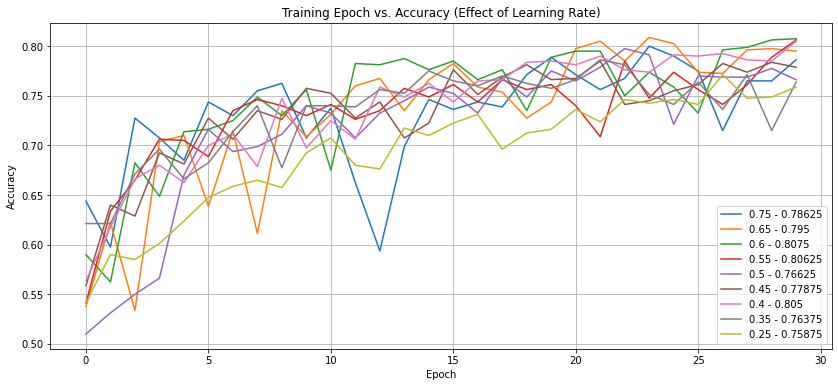

Best learning rate: 0.6


In [ ]:
def plot_accuracies_learning_rate(save_dir, learning_rate_arr):
    os.makedirs(save_dir, exist_ok=True)
    print(f"Training Epoch vs. Accuracy (Effect of Learning Rate)")
    print(f"Training Epoch vs. Accuracy (Effect of Learning Rate)")

    fig = plt.figure(figsize=(14, 6))
    plt.title(f"Training Epoch vs. Accuracy (Effect of Learning Rate)")
    plt.xlabel("Epoch")
    plt.ylabel('Accuracy')

    best_score = 0
    best_config = None

    for learning_rate in learning_rate_arr:
        final_scores = []
        epoch_scores = []
        # Run an average over multiple trials
        for i in tqdm(range(ntrials)):
            # Get data and train the network
            training_data, validation_data, testing_data, ndimen = get_data()
            nn = BPNN(best_nc, verbose=False, random_init=True)
            final_score, eval_scores, eval_scores_deltas, conv_time = nn.train(training_data,
                                                                               max_epochs=max_epochs,
                                                                               batch_size=best_b,
                                                                               learning_rate=learning_rate,
                                                                               evaluation_data=validation_data,
                                                                               evaluation_treshold=None)

            final_scores.append(final_score)
            epoch_scores.append(eval_scores)

        # Compute the averages over the specified number of trials
        final_score_avg = np.average(final_scores)
        epoch_scores = np.mean(epoch_scores, axis=0)

        print(f'{learning_rate} => {final_score_avg}')
        if final_score_avg > best_score:
            best_score = final_score_avg
            best_config = learning_rate

        plt.plot(epoch_scores, label=f'{learning_rate} - {final_score_avg}')

    plt.grid()
    plt.legend()
    plt.show()
    fig.savefig(f'{save_dir}/bpnn_lr_vs_acc', dpi=100)

    return best_config


learning_rate_arr = [0.75, 0.65, 0.60, 0.55, 0.5, 0.45, 0.40, 0.35, 0.25]
best_lr = plot_accuracies_learning_rate("img", learning_rate_arr)
print(f"Best learning rate: {best_lr}")

# Training MLP Network: Sizes=[3481, 375, 550, 350, 160, 2]	Epochs=30	Batch-Size=40	Learning-Rate=0.6
 - Training Data Len: 10000
 - Validation Data Len: 800
# Epochs:


  3%|▎         | 1/30 [00:12<06:02, 12.50s/it]

	1. Correct 506/800	(score: 0.6325	delta: 0.6325	delta_avg: 0.6325)


  7%|▋         | 2/30 [00:25<05:52, 12.57s/it]

	2. Correct 503/800	(score: 0.62875	delta: -0.00374999999999992	delta_avg: 0.314375)


 10%|█         | 3/30 [00:37<05:39, 12.57s/it]

	3. Correct 543/800	(score: 0.67875	delta: 0.04999999999999993	delta_avg: 0.22624999999999998)


 13%|█▎        | 4/30 [00:50<05:25, 12.54s/it]

	4. Correct 549/800	(score: 0.68625	delta: 0.007500000000000062	delta_avg: 0.1715625)


 17%|█▋        | 5/30 [01:02<05:13, 12.52s/it]

	5. Correct 558/800	(score: 0.6975	delta: 0.011249999999999982	delta_avg: 0.1395)


 20%|██        | 6/30 [01:15<04:59, 12.49s/it]

	6. Correct 585/800	(score: 0.73125	delta: 0.03374999999999995	delta_avg: 0.121875)


 23%|██▎       | 7/30 [01:27<04:47, 12.49s/it]

	7. Correct 533/800	(score: 0.66625	delta: -0.06499999999999995	delta_avg: 0.09517857142857143)


 27%|██▋       | 8/30 [01:40<04:34, 12.49s/it]

	8. Correct 574/800	(score: 0.7175	delta: 0.05125000000000002	delta_avg: 0.0896875)


 30%|███       | 9/30 [01:52<04:22, 12.49s/it]

	9. Correct 580/800	(score: 0.725	delta: 0.007499999999999951	delta_avg: 0.08055555555555555)


 33%|███▎      | 10/30 [02:05<04:10, 12.50s/it]

	10. Correct 575/800	(score: 0.71875	delta: -0.006249999999999978	delta_avg: 0.071875)


 37%|███▋      | 11/30 [02:17<03:57, 12.52s/it]

	11. Correct 608/800	(score: 0.76	delta: 0.04125000000000001	delta_avg: 0.06909090909090909)


 40%|████      | 12/30 [02:30<03:45, 12.51s/it]

	12. Correct 594/800	(score: 0.7425	delta: -0.01749999999999996	delta_avg: 0.061875000000000006)


 43%|████▎     | 13/30 [02:42<03:32, 12.52s/it]

	13. Correct 612/800	(score: 0.765	delta: 0.022499999999999964	delta_avg: 0.05884615384615385)


 47%|████▋     | 14/30 [02:55<03:20, 12.51s/it]

	14. Correct 613/800	(score: 0.76625	delta: 0.0012499999999999734	delta_avg: 0.054732142857142854)


 50%|█████     | 15/30 [03:07<03:07, 12.50s/it]

	15. Correct 617/800	(score: 0.77125	delta: 0.0050000000000000044	delta_avg: 0.051416666666666666)


 53%|█████▎    | 16/30 [03:20<02:54, 12.49s/it]

	16. Correct 593/800	(score: 0.74125	delta: -0.030000000000000027	delta_avg: 0.046328125)


 57%|█████▋    | 17/30 [03:32<02:42, 12.50s/it]

	17. Correct 576/800	(score: 0.72	delta: -0.02124999999999999	delta_avg: 0.042352941176470586)


 60%|██████    | 18/30 [03:45<02:29, 12.49s/it]

	18. Correct 620/800	(score: 0.775	delta: 0.05500000000000005	delta_avg: 0.043055555555555555)


 63%|██████▎   | 19/30 [03:57<02:17, 12.51s/it]

	19. Correct 604/800	(score: 0.755	delta: -0.020000000000000018	delta_avg: 0.03973684210526316)


 67%|██████▋   | 20/30 [04:10<02:05, 12.51s/it]

	20. Correct 594/800	(score: 0.7425	delta: -0.012499999999999956	delta_avg: 0.037125000000000005)


 70%|███████   | 21/30 [04:22<01:52, 12.51s/it]

	21. Correct 597/800	(score: 0.74625	delta: 0.00374999999999992	delta_avg: 0.03553571428571428)


 73%|███████▎  | 22/30 [04:35<01:40, 12.51s/it]

	22. Correct 609/800	(score: 0.76125	delta: 0.015000000000000013	delta_avg: 0.034602272727272725)


 77%|███████▋  | 23/30 [04:47<01:27, 12.51s/it]

	23. Correct 626/800	(score: 0.7825	delta: 0.02124999999999999	delta_avg: 0.03402173913043478)


 80%|████████  | 24/30 [05:00<01:15, 12.51s/it]

	24. Correct 622/800	(score: 0.7775	delta: -0.0050000000000000044	delta_avg: 0.03239583333333333)


 83%|████████▎ | 25/30 [05:12<01:02, 12.51s/it]

	25. Correct 635/800	(score: 0.79375	delta: 0.016249999999999987	delta_avg: 0.03175)


 87%|████████▋ | 26/30 [05:25<00:50, 12.51s/it]

	26. Correct 617/800	(score: 0.77125	delta: -0.022499999999999964	delta_avg: 0.029663461538461538)


 90%|█████████ | 27/30 [05:37<00:37, 12.53s/it]

	27. Correct 615/800	(score: 0.76875	delta: -0.0024999999999999467	delta_avg: 0.028472222222222225)


 93%|█████████▎| 28/30 [05:50<00:25, 12.54s/it]

	28. Correct 639/800	(score: 0.79875	delta: 0.029999999999999916	delta_avg: 0.028526785714285713)


 97%|█████████▋| 29/30 [06:02<00:12, 12.53s/it]

	29. Correct 625/800	(score: 0.78125	delta: -0.01749999999999996	delta_avg: 0.02693965517241379)


100%|██████████| 30/30 [06:15<00:00, 12.51s/it]

	30. Correct 612/800	(score: 0.765	delta: -0.016249999999999987	delta_avg: 0.025500000000000002)
Converged in 30 epochs with accuracy 0.765 took 375.36 sec


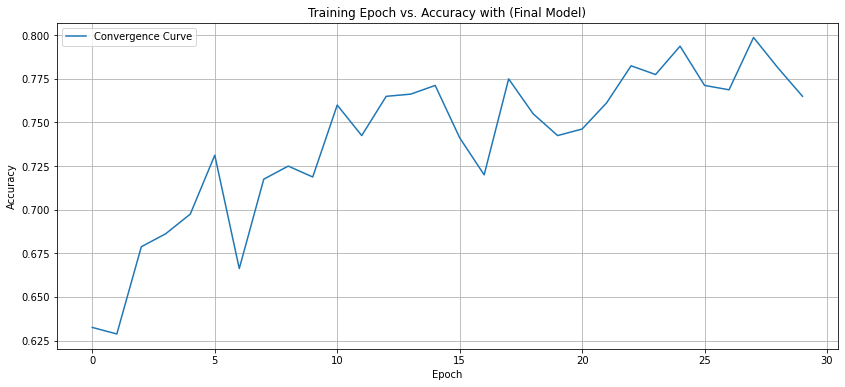

Overall Testing Accuracy: 0.7893145161290323
Class 0 Testing Accuracy: 0.6738703339882122
Class 1 Testing Accuracy: 0.9109730848861284


In [ ]:
"""
Plot the convergence curve of BPNN
"""

training_data, validation_data, testing_data, ndimen = get_data()

nn = BPNN(best_nc, verbose=True, random_init=True)
final_score, eval_scores, eval_scores_deltas, nn_conv_time = nn.train(training_data,
                                                                      max_epochs=max_epochs,
                                                                      batch_size=best_b,
                                                                      learning_rate=best_lr,
                                                                      evaluation_data=validation_data,
                                                                      evaluation_treshold=None)

fig = plt.figure(figsize=(14, 6))

plt.title(f"Training Epoch vs. Accuracy with (Final Model)")
plt.xlabel("Epoch")
plt.ylabel('Accuracy')

plt.plot(eval_scores, label='Convergence Curve')

plt.grid()
plt.legend()
plt.show()
fig.savefig(f'img/bpnn_best_model', dpi=100)

acc = 0
acc0 = 0
len0 = 0
acc1 = 0
len1 = 0

for (x, y) in testing_data:
    decision = np.argmax(nn.feedforward(x))

    if decision == y:
        acc += 1
    if y == 0:
        len0 += 1
        if decision == y:
            acc0 += 1
    if y == 1:
        len1 += 1
        if decision == y:
            acc1 += 1

nn_acc = acc / (len0 + len1)
# Compute class accuracies
nn_acc0 = acc0 / len0
nn_acc1 = acc1 / len1

print(f'Overall Testing Accuracy: {nn_acc}')
print(f'Class 0 Testing Accuracy: {nn_acc0}')
print(f'Class 1 Testing Accuracy: {nn_acc1}')
